<a href="https://colab.research.google.com/github/BunnyNoBugs/minor2021-iad3-spring/blob/main/sem11_stat2/sem11_stat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Семинар 11: AB, Статистика 2

## План семинара
- [Часть 0. Идея статистического вывода](#Часть-0.-Идея-статистического-вывода)
    - [Статистические гипотезы](#Статистические-гипотезы)
    - [Статистический критерий](#Статистический-критерий)
    - [Уровень статистической значимости (p-value)](#Уровень-статистической-значимости-(p-value))
    - [Ошибки первого и второго рода](#Ошибки-первого-и-второго-рода)
    - [Мощность критерия](#Мощность-критерия)
- [Часть 1. Сравнение средних и t-тест](#Часть-1.-Сравнение-средних-и-t-тест)
    - [Случай несвязных выборок](#Случай-несвязных-выборок)
    - [Случай связных выборок](#Случай-связных-выборок)
    - [Требования к данным](#Требования-к-данным)
- [Часть 2. Хи-квадрат](#Часть-2.-Хи-квадрат)
    - [Сравнение эмпирического распределения с теоретическим](#Сравнение-эмпирического-распределения-с-теоретическим)
    - [Сравнение двух экспериментальных распределений](#Сравнение-двух-экспериментальных-распределений)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Часть 0. Идея статистического вывода

Для начала, вспомним некоторые понятия из математической статистики.

### Статистические гипотезы

Исследователю в процессе работы часто приходится отвечать на вопросы типа:
1. Можно ли утверждать, что новый баннер увеличивает CTR (click-through rate)?
2. Действительно ли разаботанное лекарство ускоряет процесс выздоравления пациентов?
3. Правда ли, что средняя продолжительность жизни в двух конкретных странах разная?
4. И др.

Для того, чтобы ответить на эти вопросы необходимо сформулировать статистические гипотезы. Формулирование гипотез систематизирует предположения исследователя и представляет их в четком и лаконичном виде.


Статистические гипотезы разделяют на **нулевые** и **альтернативные**:
1. **Нулевая гипотеза $H_0$** - это гипотеза об отсутствии различий. Нулевая гипотеза - это то, что мы хотим опровергнуть, если перед нами стоит задача доказать значимость различий.
2. **Альтернативная гипотеза $H_1$** - это гипотеза о значимости различий, то, что мы хотим доказать.


Например, для третьего вопроса гипотезы можно сформулировать следующим образом:
1. **Нулевая гипотеза $H_0$**: среднии продолжительности жизни в этих странах **равны**.
2. **Альтернативная гипотеза $H_1$**: среднии продолжительности жизни в этих странах **не равны**.

**Задание:** Сформулируйте нулевую и альтернативную гипотезы для первого и второго вопроса.

### Статистический критерий

Статистический критерий - это решающее правило, обеспечивающее надежное поведение, то есть принятие истинной и отклонение ложной гипотезы с высокой вероятностью. Статистические критерии обозначают также метод расчета определенного числа и само это число.

### Уровень статистической значимости (p-value)

**Уровень значимости** - это вероятность того, что мы сочли различия существенными, а они на самом деле случайны.
Когда мы указываем, что различия достоверны на $5\%$-ом уровне значимости, или при $р<0,05$, то мы имеем виду, что вероятность того,
что они все-таки недостоверны, составляет $0,05$.

Если перевести все это на более формализованный язык, то уровень значимости - это вероятность отклонения нулевой гипотезы, в то
время как она верна.

Нулевую гипотезу отклоняют (обычно), если достигнутый уровень значимости $р<0,05$.

### Ошибки первого и второго рода

- **Ошибкой I рода** называется ошибка, состоящая в том, что мы **отклонили** нулевую гипотезу, в то время как она верна.
- **Ошибкой II рода** называется ошибка, состоящая в том, что мы **приняли** нулевую гипотезу, в то время как она неверна.

### Мощность критерия

**Мощность критерия** - это его способность выявлять различия, если они есть. Иными словами, это его способность отклонить нулевую гипотезу об отсутствии различий, если она неверна.


Вероятность ошибки II рода обозначается как $\beta$.

Мощность критерия - это его способность не допустить ошибку II рода, поэтому:

   - Мощность $ = 1 - \beta$.

Мощность критерия определяется эмпирическим путем. Одни и те же задачи могут быть решены с помощью разных критериев, при
этом обнаруживается, что некоторые критерии позволяют выявить различия там, где другие оказываются неспособными это сделать, или выявляют более высокий уровень значимости различий. Возникает вопрос:
а зачем же тогда использовать менее мощные критерии? Дело в том,
что основанием для выбора критерия может быть не только мощность,
но и другие его характеристики, а именно:
- простота
- более широкий диапазон использования (например, по отношению к данным, определенным по номинативной шкале, или по отношению к
большим $n$)
- применимость по отношению к неравным по объему выборкам

## Часть 1. Сравнение средних и t-тест

In [ ]:
from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import t, norm

**t-критерий Стьюдента** (или **t-тест**) направлен на оценку различий велечин средних $\bar{X}$ и $\bar{Y}$ двух выборок $X$ и $Y$, которые распределенны по нормальному закону. Критерий может быть использован для сопоставления средних у связных и несвязных выборок, причем выборки могут быть не равны по величине.

t-критерий Стьюдента основан на **распределении Стьюдента** - однопараметрическом непрерывном распредлении, где в качестве параметра выступает **число степеней свободы $n$**. Число степений свободы считается как количество элементов выборки минус 1.

Распределение Стьюдента очень похоже на нормальное распределение, но его график плотности при малом количестве степеней свободы имеет более тяжелые хвосты - случайная величина чаще **сильно** отклоняется от своего среднего значения. При $n\geq30$ практически полностью совпадает с нормальным распределением.

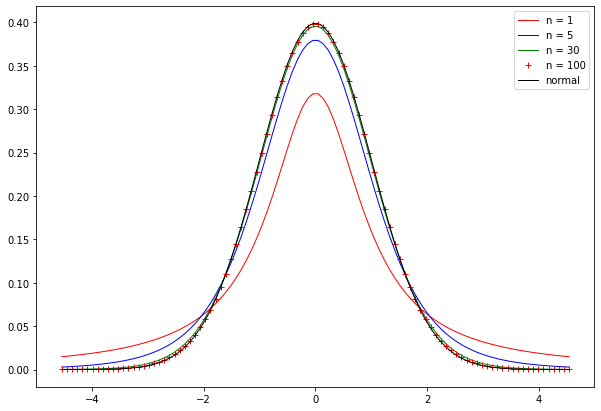

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
x = np.linspace(t.ppf(0.01, 3), t.ppf(0.99, 3), 100)
ax.plot(x, t.pdf(x, 1), 'r', lw=1, label='n = 1')
ax.plot(x, t.pdf(x, 5), 'b-', lw=1, label='n = 5')
ax.plot(x, t.pdf(x, 30), 'g-', lw=1, label='n = 30')
ax.plot(x, t.pdf(x, 100), 'r+', lw=1, label='n = 100')
ax.plot(x, norm.pdf(x), 'black', lw=1, label='normal')
ax.legend();

### Случай несвязных выборок

Рассмотрим следующий пример:

Психолог измерял время сложной сенсомотороной реакции выбора (в мс) в контрольной и эксперментальной группах. В экспериментальную группу ($X$) входили 9 спортсменов высокой квалификации. Контрольной группой ($Y$) являлись 8 человек, активно не занимающиеся спортом. Психолог проверяет гипотезу о том, что средняя скорость сложной сенсомоторной реакции выбора у спортсменов выше, чем эта же величина у людей, не занимающихся спортом.

В результате эксперимента получились следующие средние значения:
- Для спортсменов: $\bar{X} = 526$
- Для не занимающихся спортом: $\bar{Y} = 638$

Сырые данные эксперимента приведены ниже.

In [ ]:
# Экспериментальная группа
X_1 = [504, 560, 420, 600, 580, 530, 490, 580, 470]
# Контрольная группа
Y_1 = [580, 692, 700, 621, 640, 561, 680, 630]

**Задание:** Сформулируйте нулевую и альтернативную гипотезы.

Проверим, является ли различие в средних статистически значимым.  Для этого воспользуемся функцией [`ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) для **несвязных** выборок.

In [ ]:
###################################################
# Ваш код здесь
ttest_ind(X_1, Y_1)
###################################################

Ttest_indResult(statistic=-4.12624181242505, pvalue=0.0008972556364194241)

**Вопрос:** Что можно сказать про результаты теста?

**Задание:** Допустим, в ходе исследования мы хотели выяснить, влияет ли новый разработанный препарат на скорость выздоравления. Экспериментальная группа получала разработанный препарат, а контрольная - нет. Мы замеряли время выздоравления и применили t-тест к полученным данным. И в итоге получили $p = 0.004$.

Выберете правильные утверждения:

1. Т.к. в нашем исследовании $p$ уровень значимости равен 0,004, то вероятность того, что верна нулевая гипотеза (новый препарат не влияет на скорость выздоровления) также равняется всего-лишь 0,004.
2. Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза, и новый препарат не влияет на скорость выздоровления.
3. Чем меньше p уровень значимости, тем сильнее получаемые различия. Например, если бы p уровень значимости в нашем исследовании был бы равен 0,0001, значит новый препарат еще сильнее бы влиял на скорость выздоровления.
4. Вероятность получить такие (как в эксперименте) или большие различия между среднем временнем выздоравления в экспериментальной и контрольной группе, при условии того, что нулевая гипотеза верна, равна 0.004.

### Случай связных выборок

Рассмотрим следующий пример:

Психолог предположил, что в результате обучения время решения эквивалентных задач (т.е. имеющих один и тот же алгоритм решения) будет значимо уменьшаться. Для проверки гипотезы у восьми испытуемых сравнивалось время решения (в минутах) первой и третьей задач.

В результате эксперимента получились следующие средние значения:
- Для первой задачи: $\bar{X} = 4.6375$
- Для третьей задачи: $\bar{Y} = 3.4875$

Сырые данные приведены ниже.

In [ ]:
# Время, потраченое на решение первой задачи
X_2 = [4.0, 3.5, 4.1, 5.5, 4.6, 6.0, 5.1, 4.3]
# Время, потраченое на решение третьей задачи
Y_2 = [3.0, 3.0, 3.8, 2.1, 4.9, 5.3, 3.1, 2.7]

**Задание:** Сформулируйте нулевую и альтернативную гипотезы.

Проверим, являются ли различие в средних статистически значимым.  Для этого воспользуемся функцией [`ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel) для **связных** выборок.

In [ ]:
###################################################
# Ваш код здесь
ttest_rel(X_2, Y_2)
###################################################

Ttest_relResult(statistic=2.7979908224842562, pvalue=0.02660095438966255)

In [ ]:
ttest_ind(X_2, Y_2)

Ttest_indResult(statistic=2.34502977713557, pvalue=0.03428662473942781)

**Вопрос:** Что можно сказать про результаты теста?

### Требования к данным

Для применения t-критерия Стьюдента данные должны удовлетворять следующим условиям:
- **несвязные выборки**:
    1. Гомогенность дисперсий - дисперсии внутри наших групп должны быть приблизительно одинаковыми
    2. Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)
    
    
- **связные выборки**:
    1. Нормальность распределения (особенно важно для выборок с количеством наблюдений меньше 30)

#### Проверка гомогенности дисперсий

In [ ]:
from scipy.stats import levene

Проверить гомогенность дисперсий можно с помощью **критерия Левена**. Проделаем это для примера с несвязными выборками, используя функцию [`levene`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#scipy.stats.levene).

In [ ]:
###################################################
# Ваш код здесь
levene(X_2, Y_2)
###################################################

LeveneResult(statistic=0.12853470437017966, pvalue=0.7253047789632902)

**Вопрос:** Что можно сказать про результаты теста?

#### Проверка нормальности распределения

In [ ]:
from scipy.stats import shapiro

Проверить распределение на нормальность можно:
- визуально с помощью **графика квантиль-квантиль (Q-Q plot)** или
- с помощью **кретерия Шапиро-Уилка**

Давайте сначала проверим наши выборки по критерию Шапиро-Уилка ([`shapiro`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro))

In [ ]:
###################################################
# Ваш код здесь
print(shapiro(X_2))
print(shapiro(Y_2))
###################################################

(0.9654372930526733, 0.8599994778633118)
(0.9026064872741699, 0.30491647124290466)


**Вопрос:** Что можно сказать про результаты теста?

Теперь давайте для начала потренируемся в интерпретации [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) на синтетических данных. Воспользуемся функцией [`qqplot`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html).

<img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Normal_normal_qq.svg" width="400">

In [ ]:
from statsmodels.api import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Сгенерируем четыре выборки размером 1000:
    - из нормального распределения
    - из нормального распределения, скошенного впрово [`skewnorm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html),  с коэффициентом ассиметрии $= 2$
    - из нормального распруделения, скошенного влево, с коэффициентом ассиметрии $= -2$
    - из распределения Стьюдента с двумя степенями свободы
2. Для каждой выборки построим Q-Q plot. Будем сравнивать с нормальным распределением, так же будем отображать контрольную линию.
3. Также, для каждой выборки построим график её плостности распределения и плотности нормального распределения.

3. Проинтерпретируем графики

In [ ]:
# Нормальное распределение
###################################################
# Ваш код здесь
###################################################

In [ ]:
# Нормальное распределение, скошенное вправо
###################################################
# Ваш код здесь
###################################################

In [ ]:
# Нормальное распределение, скошенное влево
###################################################
# Ваш код здесь
###################################################

In [ ]:
# Распределение Стьюдента, n = 2
###################################################
# Ваш код здесь
###################################################

Теперь проверим наши данные на нормальность с помошью Q-Q plot.

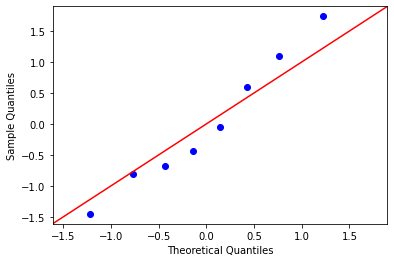

In [ ]:
###################################################
# Ваш код здесь
fig = qqplot(np.array(X_2), norm, fit=True, line='45')
###################################################

## Часть 2. Хи-квадрат

Критерий $\chi^2$ используют в двух случаях:
1. Для расчета согласия эмперического распределения и предполагаемого теоретического. В этом случае проверяется нулевая гипотеза об отсутствии различий между теоретическим и эмперическим распределениями.

2. Для расчета однородности двух независимых экспериментальных выборок. В этом случае проверятеся гипотеза $H_0$ об отсутствии различий между двумя эмпирическими (экспериментальными) распределениями.


Критерий основан на **распределении $\chi^2$**. **Распределении $\chi^2$ с $k$ степенями свободы** - это распределение суммы квадратов $k$ независимых стандартных нормальных случайных величин.

Если
$$Y = \sum\limits_{i=1}^{k} X_i$$ и $$X_i \sim N(0, 1)$$ то $$Y \sim \chi^2_k$$

По выборке параметр $k$ определяется как число элементов в выборке минус 1.

Графики плотности распределения для разных значений $k$.
<img src="https://upload.wikimedia.org/wikipedia/commons/2/21/Chi-square_distributionPDF.png?uselang=ru" width=500>

Исходнык данные для $\chi^2$ могут буть представлены в любой шкале, например категоральной. Тогда, решаемый вопрос можно было бы сформулировать так: с одинаковой ли частотой встречаются разные значения признака в эмпирическом и теоретическом распределениях.


Критерий построен так, что при полном совпадении экспериментального и теоретического (или двух экспериментальных) распределений величина $\chi^2_{эмп}$ (*хи*-квадрат эмпирическое) $=0$, и чем больше расхождение между сопоставляемыми распределениями, тем больше величина значения $\chi^2_{эмп}$.

### Сравнение эмпирического распределения с теоретическим

#### Пример с игральной костью
Предположим, что исследователю в эксперименте необходимо использовать игральный кубик (шестигранный). Для чистоты эксперимента кубик должен быть "идеальным", т.е. таким, чтобы при достаточно большом числе подбрасываний, каждая грань выпадала бы примерно равное число раз. Задача состоит в выяснении того, будет ли данный кубик близок к идеальному?

Чтобы это проверить, исследователь подбросил кубик 60 раз, при этом количество выпадений каждой грани распределилось следующим образом:

| **Грани кубика**| 1 | 2 | 3 | 4 | 5 | 6 |
|------|------|------|------|------|------|------|
|**Эмпирические частоты** | 12 | 9 | 11 | 14 | 8 | 6 |
|**Теоретические частоты** | 10 | 10 | 10 | 10 | 10 | 10 |

**Задание:** Сформулируйте нулевую и альтернативную гипотезы.

Применим критерий $\chi^2$, воспользовавшись функцией [`chisquare`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare)

In [ ]:
from scipy.stats import chisquare
###################################################
# Ваш код здесь
obs = [12, 9, 11, 14, 8, 6]
exp = [10, 10, 10, 10, 10, 10]

print(chisquare(obs, exp))
###################################################

Power_divergenceResult(statistic=4.2, pvalue=0.5209949534314051)


**Вопрос:** Что можно сказать про результаты теста?

Кубик честный


### Сравнение двух экспериментальных распределений

На практике часто встречаются задачи, в которых необходимо сравнивать не теоретическое распределение с эмпирическим, а два и более эмпирических распределения между собой.

Рассмотрим задачу:

Одинаков ли уровень подготовленности учащихся в двух школах, если в первой школе из 100 человек поступило в вуз 82 человека, а во второй школе из 87 поступили 44?

**Таблица сопряженности:**

|№ школы|школа 1|школа 2|
|------|------|------|
|**Число поступивших**|82|18|
|**Число не поступивших**|44|43|
|**Всего**|100|87|

**Задание:** Сформулируйте нулевую и альтернативную гипотезы.

Применим критерий $\chi^2$, воспользовавшись функцией [`chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency)

In [ ]:
from scipy.stats import chi2_contingency
###################################################
# Ваш код здесь
cont_table = np.array([[82, 44], [18, 43]])
chi2_contingency(cont_table)
###################################################

(19.498190870249235,
 1.0069500556409318e-05,
 1,
 array([[67.37967914, 58.62032086],
        [32.62032086, 28.37967914]]))

In [ ]:
cont_table

array([[ 82,  18],
       [ 44,  43],
       [100,  87]])

**Вопрос:** Что можно сказать про результаты теста?